<a href="https://colab.research.google.com/github/utkarshnsr/Car-Price-Prediction-Encoding-Practice-/blob/main/CarPricePrediction(Encoding-Example).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this exercise is to practice the dummy variables concept and one hot encoding. 

In [16]:
import pandas as pd
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt

In [17]:
carPricesDf = pd.read_csv("/content/carprices.csv")
carPricesDf

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


We now have to see if using linear regression is appropriate in this situation. Let's us see the relationship between Mileage and Sell Price

Text(0, 0.5, 'Sell Price')

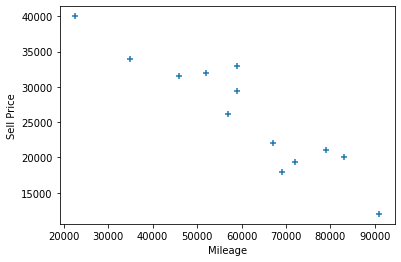

In [18]:
plt.scatter(carPricesDf['Mileage'],carPricesDf['Sell Price($)'],marker="+")
plt.xlabel("Mileage")
plt.ylabel("Sell Price")

Text(0, 0.5, 'Sell Price')

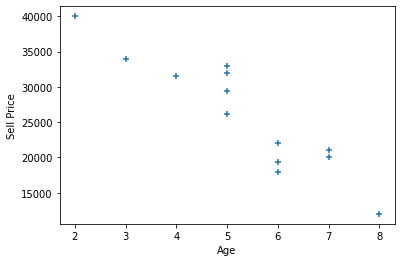

In [19]:
plt.scatter(carPricesDf['Age(yrs)'],carPricesDf['Sell Price($)'],marker="+")
plt.xlabel("Age")
plt.ylabel("Sell Price")

It is appropriate to apply Linear Regression in this case. 

In [20]:
dummies = pd.get_dummies(carPricesDf['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [21]:
mergedDf = pd.concat([carPricesDf,dummies],axis='columns')
mergedDf

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [22]:
mergedDf.columns

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)', 'Audi A5',
       'BMW X5', 'Mercedez Benz C class'],
      dtype='object')

In [23]:
mergedDf.drop(['Car Model','Mercedez Benz C class'],inplace=True,axis=1)

We are dropping one of the encoding columns to avoid dummy variable trap.

In [25]:
mergedDf

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [31]:
#training model step
from sklearn import linear_model

linReg = linear_model.LinearRegression()
linReg.fit(mergedDf[['Mileage','Age(yrs)','Audi A5','BMW X5']].values,mergedDf['Sell Price($)'])

LinearRegression()

In [32]:
linReg.coef_,linReg.intercept_

(array([-3.70122094e-01, -1.33245363e+03, -2.45354074e+03, -6.73820733e+03]),
 58976.62596853724)

Goals



*   Predict price of a Mercedez Benz C Class that is 4 years old with 45000 mileage
*   Predict price of a BMW that is 7 years old with mileage 86000
*   Describe the accuracy of the model 



Goal #1

In [33]:
linReg.predict([[45000,4,0,0]])

array([36991.31721061])

Goal #2

In [34]:
linReg.predict([[86000,7, 0, 1]])

array([11080.74313219])

Goal #3

In [30]:
X = mergedDf[['Mileage','Age(yrs)','Audi A5','BMW X5']]
y = mergedDf['Sell Price($)']
linReg.score(X,y)

0.9417050937281083